# Titanic

## Introduction
This notebook is a study of the Kaggle project <a href = "https://www.kaggle.com/c/titanic">Titanic: Machine Learning from disaster</a>. The goal is to understand and to develop a general workflow of machine learning problem. 

## Workflow stages
The competition solution workflow goes through seven stages described
<ol>
  <li> Question or problem definition.</li>
  <li> Aquire training and testing data.</li>
  <li> Wrangle, prepare and clean the data.</li>
  <li> Analyze, identify patterns and explore the data.</li>
  <li> Model, predict and solve the problem.</li>
  <li> Visualize, report and present the problem solving steps and final solution.</li>
  <li> Supply and submit the result. </li>
</ol>

1, 2, 3, are actually the most important for general data analysis, but is much simplified in a Kaggle competition. For Kaggle, the emphasis becomes 4, 5, 6. In general, people talk about EDA, feature engineering, feature selection and model training, and finally ensemble all the learning models to a meta learner using stacking/boosting.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.
<ul>
<li>We may combine mulitple workflow stages. We may analyze by visualizing data.</li>
<li>Perform a stage earlier than indicated. We may analyze data before and after wrangling.</li>
<li>Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.</li>
<li>Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.</li>
</ul>

## Workflow goals
The data science solutions workflow solves for seven major goals.
<ol>
<li>
**Classifying**. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.
</li>
<li> 
**Correlating**. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.
</li>
<li>
**Converting**. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.
</li>
<li>
**Completing**. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.
</li>
<li>
**Correcting**. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.
</li>
<li>
**Creating**. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.
</li>
<li>
**Charting**. How to select the right visualization plots and charts depending on nature of the data and the solution goals. A good start is to read the Tableau paper on <a href = "https://www.tableau.com/sites/default/files/media/which_chart_v6_final_0.pdf">Which chart or graph is right for you?</a>.
</li>
</ol>

### Import libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random
import re
from sklearn import preprocessing

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
combine = [train_df, test_df]

# store passengerID for submission
PassengerId = test_df['PassengerId']

# preview the data 
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: Survived, Sex and Embarked. Ordinal: PassengerID, Pclass.

**Which features are numerical?**

These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Continous: Age, Fare. Discrete: SibSp, Parch.

**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features are text?**

These values contain descriptions. We need to extract informaiton by dividing text into tokens and do statistics on the strings. 

Name is a text feature here. 

In [4]:
train_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [5]:
train_df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Exploratory Data Analysis (EDA)

### Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.<br>

**Which features are available in the dataset?**

Noting the feature names for directly manipulating or analyzing these. These feature names are described on <a href = "https://www.kaggle.com/c/titanic/data">the Kaggle data page here</a>.

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting. Usually for text features, we need to extract tokens and do frequency analysis. 

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

**Which features contain blank, null or empty values?**

These will require correcting.
<ul>
<li> Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.</li>
<li> Cabin > Age are incomplete in case of test dataset.</li>
</ul>

I think Carbin misses too much data, may just drop it. Another option is to have a new feature, whether having Cabin information or not.

**What are the data types for various features?**

Helping us during converting goal.
<ul>
<li> Seven features are integer or floats. Six in case of test dataset.</li>
<li> Five features are strings (object).</li>
</ul>

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.
<ul>
<li> Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).</li>
<li> Survived is a categorical feature with 0 or 1 values. </li>
<li> Around 38.38% samples survived representative of the actual survival rate at 32%.</li>
<li> Most passengers (> 75%) did not travel with parents or children.</li>
<li> Nearly 30% of the passengers had siblings and/or spouse aboard.</li>
<li> Fares varied significantly with few passengers (< 1%) paying as high as $512. </li>
<li> Few elderly passengers (< 1%) within age range 65-80. </li>
</ul>

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


** What is the distribution of categorical features?**
<ul>
<li> Names are unique across the dataset (count=unique=891).</li>
<li> Sex variable as two possible values with 65% male (top=male, freq=577/count=891).</li>
<li> Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.</li>
<li> Embarked takes three possible values. S port used by most passengers (top=S).</li>
<li> Ticket feature has high ratio (22%) of duplicate values (unique=681).</li>
</ul>

### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.
<ol>
<li>
**Correlating.**
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
</li>

<li>
**Completing.**
<ul>
<li>We may want to complete Age feature as it is definitely correlated to survival.</li>
<li>We may want to complete the Embarked feature as it may also correlate with survival or another important feature.</li>
</ul>
</li>

<li>
**Correcting.**
In other words, feature selection. In more complicated situation, we need to use algorithm to help us to select features. In this simple example, we use domain knowledge to drop features by hand. 
<ul>
<li> Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.</li>
<li> Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.</li>
<li> PassengerId may be dropped from training dataset as it does not contribute to survival.</li>
<li> Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.</li>
</ul>
</li>

<li>
**Creating.**
This is the most important step (feature engineering).
<ul>
<li>We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.</li>
<li>Engineer a feature from the above, we include a feature isAlone or not.</li>
<li>We may want to engineer the Name feature to extract Title as a new feature.</li>
<li>We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.</li>
<li>We may also want to create a Fare range feature if it helps our analysis.</li>
<li>We may include a feature whether the person has a carbin or not. 
<li> Ticket may also extract has letters and the length of number. </li>
</ul>
</li>

<li>
**Classifying.**
We may also add to our assumptions based on the problem description noted earlier.
<ul>
<li>Women (Sex=female) were more likely to have survived.</li>
<li>Children (Age<?) were more likely to have survived.</li>
<li>The upper-class passengers (Pclass=1) were more likely to have survived.</li>
</ul>
</li>
</ol>

### Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex, Embarked), ordinal (Pclass) or discrete (SibSp, Parch) type.
<ul>
<li>Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.</li>
<li>Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).</li>
<li>SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).</li>
<li> The correlation of Embarked is not that obvious except that People from C has a higher mean.</li>
</ul>

Note that this is categorical/discrete vs categorical. We use groupby and mean to see the correlation. 

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [13]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

**Plotting correlation above**

Let's start from plotting the correlation we explored above. To plot the mean of survived using point plot. 

In [14]:
from myPlot import cate_plot, num_plot

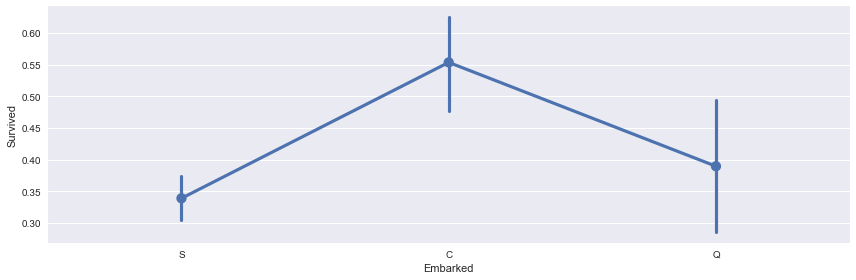

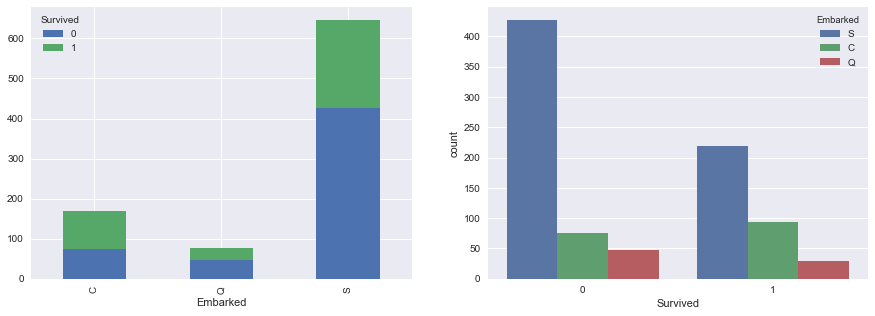

In [15]:
# Embarked

# only in train_df, fill the two missing values with the most occurred value, which is "S".
train_df["Embarked"] = train_df["Embarked"].fillna("S")

# plot
cate_plot(train_df, 'Embarked', 'Survived', order=[0,1])

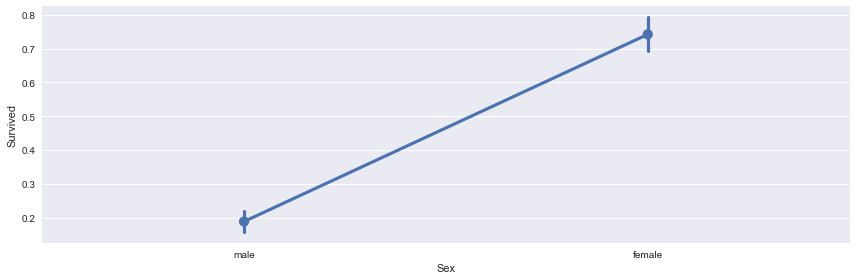

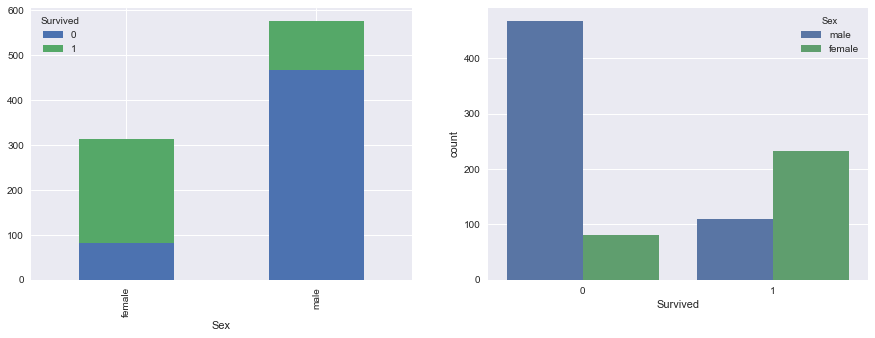

In [16]:
cate_plot(train_df,'Sex', 'Survived', [0,1])

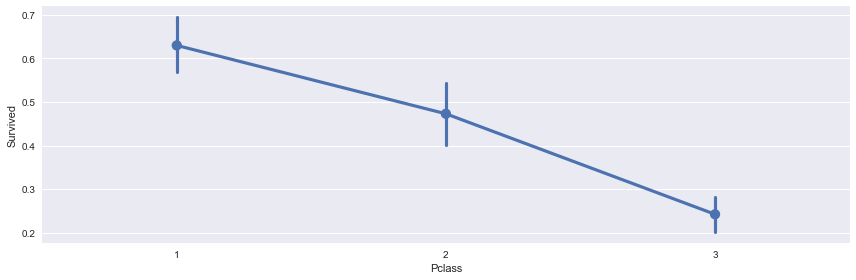

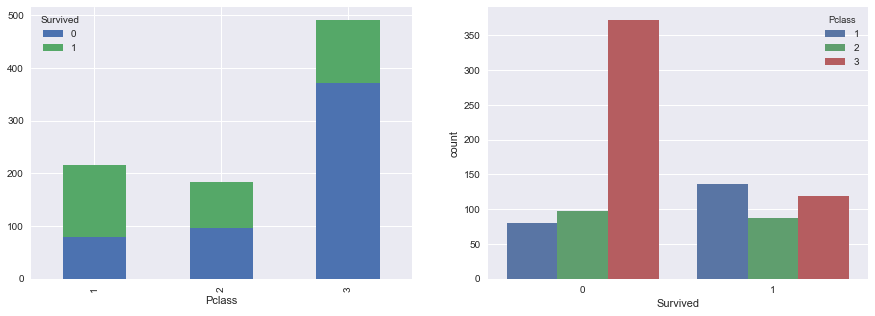

In [17]:
cate_plot(train_df, 'Pclass', 'Survived', [0,1])

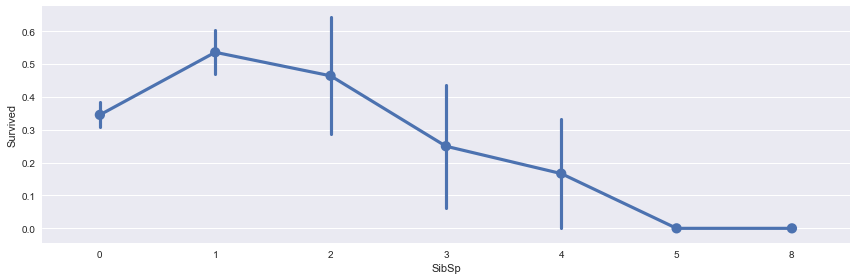

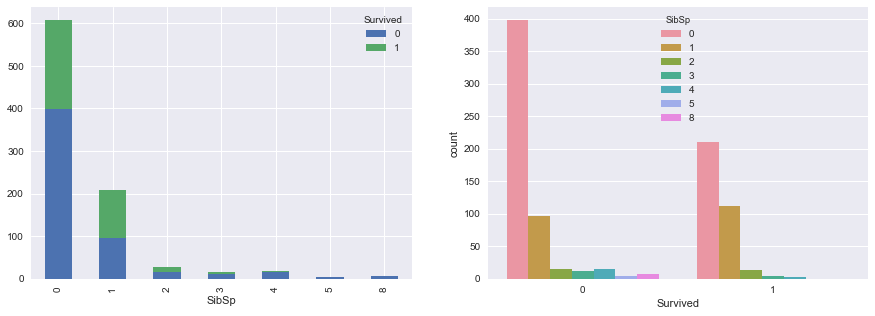

In [18]:
cate_plot(train_df, 'SibSp', 'Survived', [0,1])

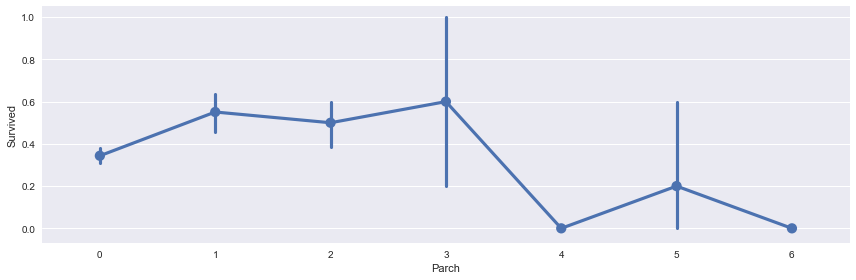

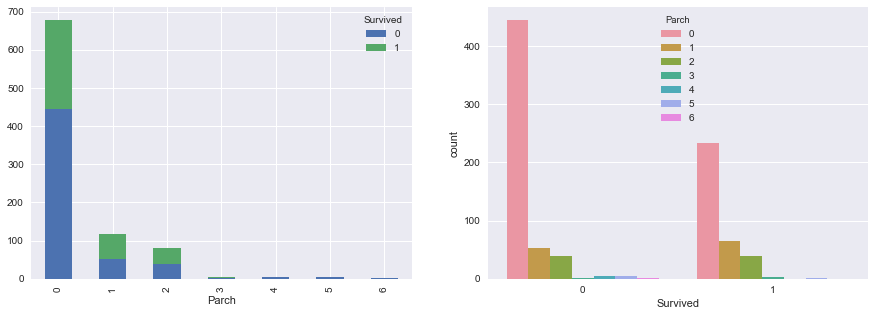

In [19]:
cate_plot(train_df, 'Parch', 'Survived', [0,1])

### Correlating numerical features
Understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

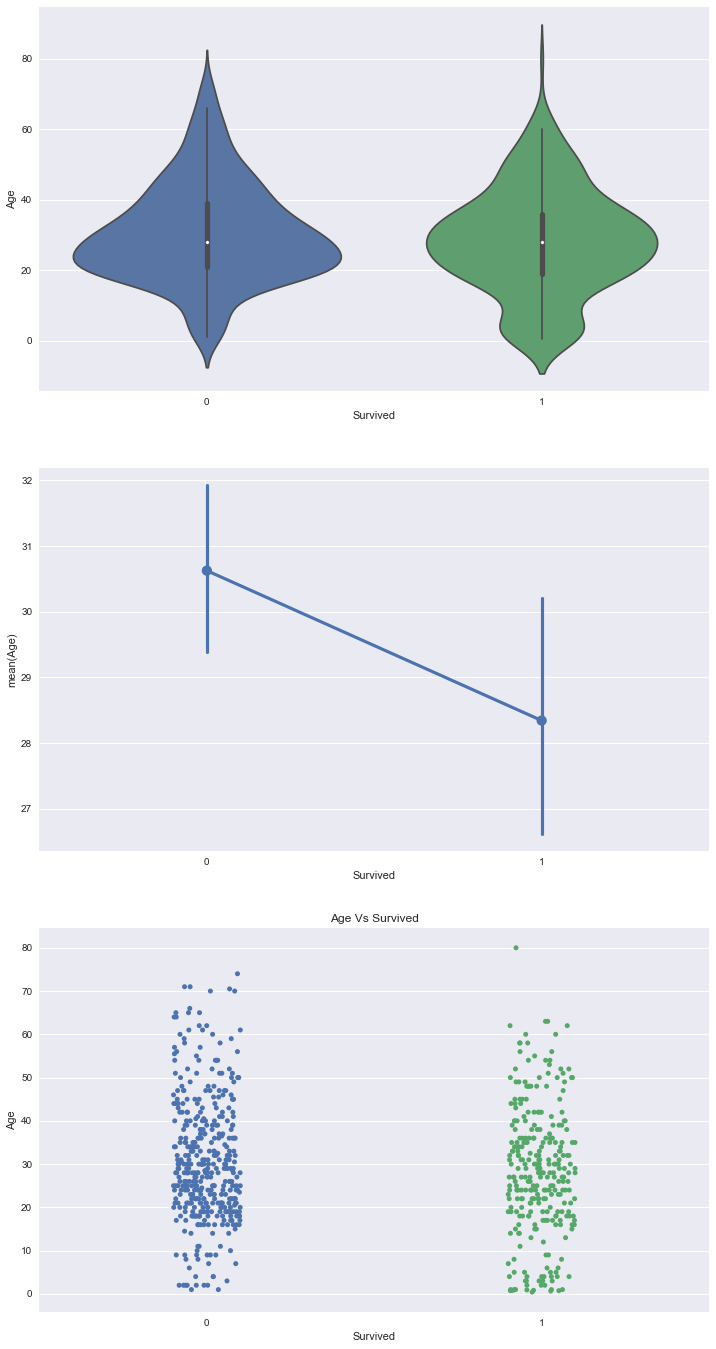

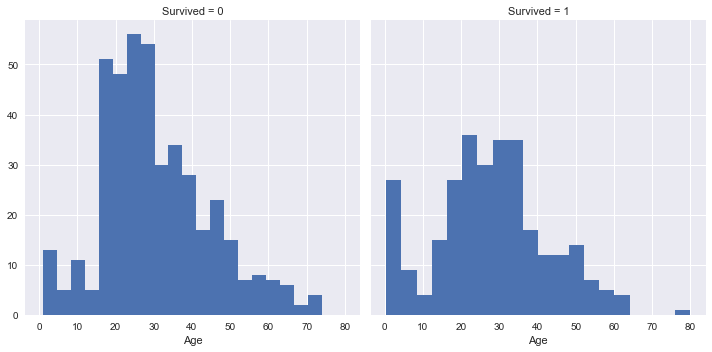

In [20]:
# Age
num_plot(train_df, 'Age', 'Survived', 20, order=[0,1])

**Observations.**
<ul>
<li> Infants (Age <=4) had high survival rate.</li>
<li> Oldest passengers (Age = 80) survived.</li>
<li> Large number of 15-25 year olds did not survive.</li>
<li> Most passengers are in 15-35 age range.</li>
</ul>

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
<ul>
<li>We should consider Age (our assumption classifying #2) in our model training.</li>
<li>Complete the Age feature for null values (completing #1).</li>
<li>We should band age groups (creating #4).</li>
</ul>

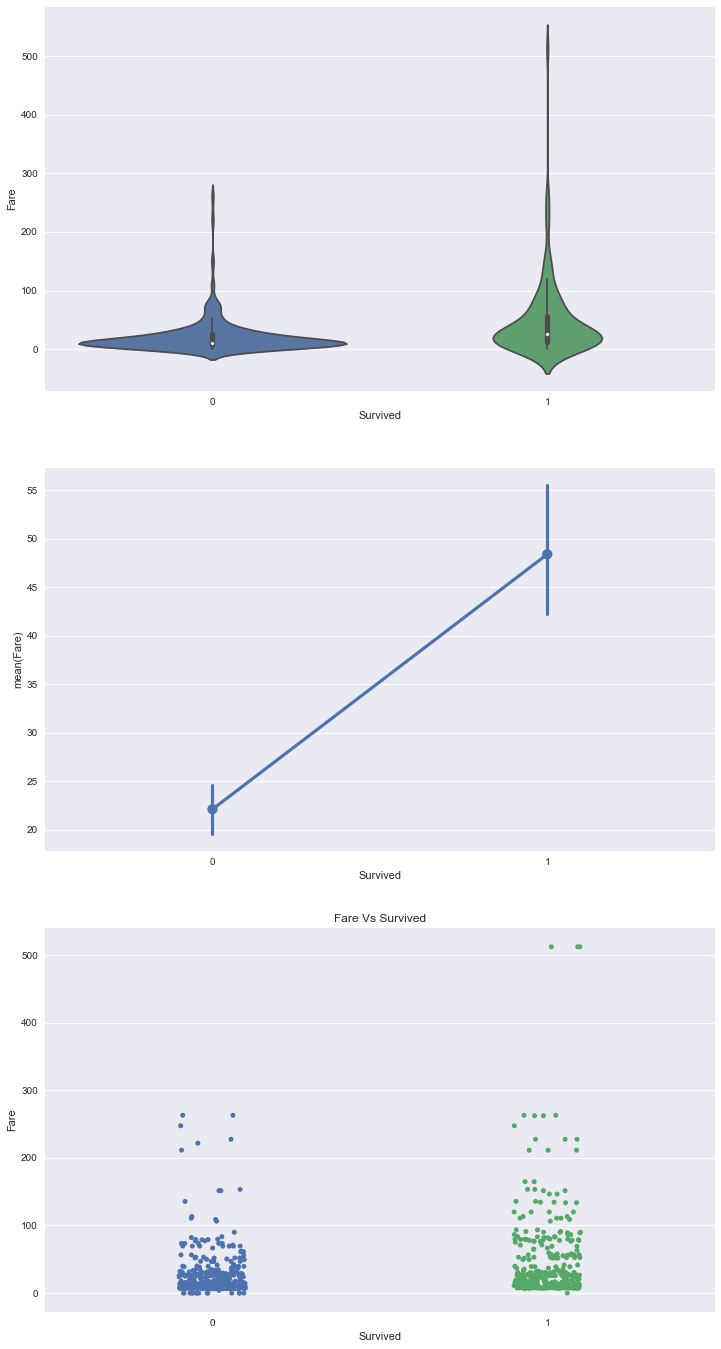

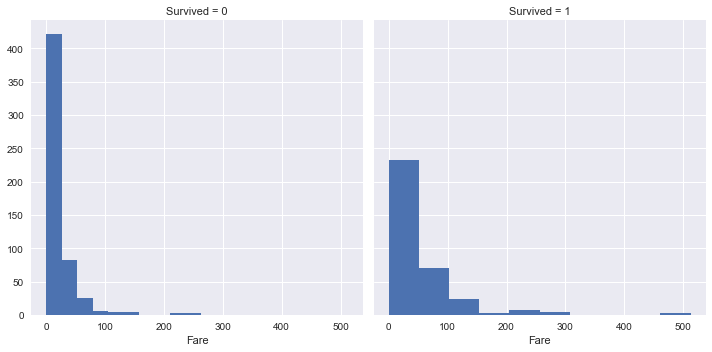

In [21]:
# Fare
num_plot(train_df, 'Fare', 'Survived', order=[0,1])

**Observations.**
<ul>
<li> Small Fare has low survival rate.</li>
<li> Those survived tend to have higher fare.</li>
<li> Most fare are below 50. The data is very skewed.</li>
<li> The values are very skewed. We need to remove outliers and normalize it. 
</ul>

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
<ul>
<li>We should consider Fare.</li>
<li>We should band Fare (creating #5).</li>
<li>We should normalize the data. Take log of Fare before banding.</li>
</ul>

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

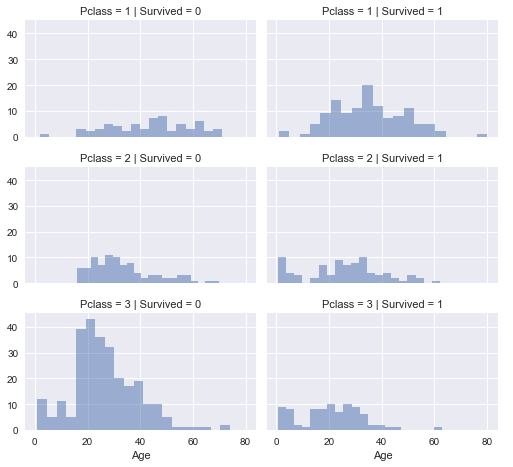

In [22]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [23]:
train_df[['Pclass','Sex', 'Age', 'Survived']].pivot_table(index='Pclass', columns='Sex')

Age             Survived          
Sex        female       male    female      male
Pclass                                          
1       34.611765  41.281386  0.968085  0.368852
2       28.722973  30.740707  0.921053  0.157407
3       21.750000  26.507589  0.500000  0.135447

**Observations.**
<ul>
<li> Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.</li>
<li> Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.</li>
<li> Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.</li>
<li> Pclass varies in terms of Age distribution of passengers.</li>
</ul>
**Decisions.**
<ul>
<li>Consider Pclass for model training.</li>
</ul>

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

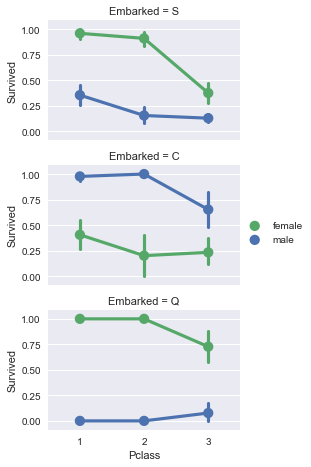

In [24]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [25]:
train_df[['Pclass','Embarked', 'Age', 'Survived']].pivot_table(index='Pclass', columns='Embarked')

Age                      Survived                    
Embarked          C        Q          S         C         Q         S
Pclass                                                               
1         38.027027  38.5000  38.367455  0.694118  0.500000  0.589147
2         22.766667  43.5000  30.386731  0.529412  0.666667  0.463415
3         20.741951  25.9375  25.696552  0.378788  0.375000  0.189802

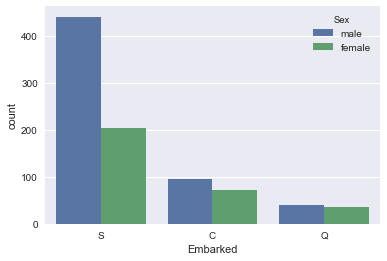

In [26]:
sns.countplot(x='Embarked', data=train_df, hue='Sex')

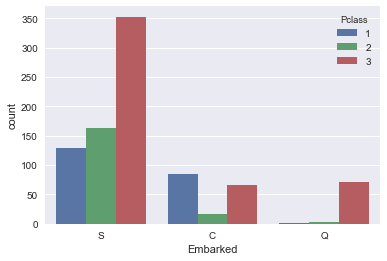

In [27]:
sns.countplot(x='Embarked', data=train_df, hue='Pclass')

In [28]:
train_df[['Sex','Embarked', 'Age', 'Survived']].pivot_table(index='Sex', columns='Embarked')

Age                        Survived                    
Embarked          C          Q          S         C         Q         S
Sex                                                                    
female    28.344262  24.291667  28.007979  0.876712  0.750000  0.692683
male      32.998841  30.937500  30.291440  0.305263  0.073171  0.174603

**Observations.**
- Female passengers had much better survival rate than males. Confirms classifying (#1).
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).
- The bigger proportion of males at S contributes to the low survival rate.
- The most interestring thing happens at Q, the 1st class male have a very low survival rate, even lower than 3 class male at Q. Further study of the numbers show that this is due to the lack of data at Q for class=1,2. Only 1 male, (Survived = 0) at class=1, and 1 male at class=2 also (Survived=0).
- We check this distribution for test data. 
- Another interesting thing is the male/female survival rate in C. It is probablity due to the fact that Pclass=1 is the most for C. 

**Decisions.**
- Add Sex feature to model training.
- Complete and add Embarked feature to model training.
- Check the case for Embarked= Q, maybe just combine it with other Embark. 

In [29]:
train_df[['Pclass','Embarked', 'Sex', 'Name']].groupby(['Pclass','Embarked', 'Sex'], as_index=False).count()

,Pclass,Embarked,Sex,Name
0,1,C,female,43
1,1,C,male,42
2,1,Q,female,1
3,1,Q,male,1
4,1,S,female,50
5,1,S,male,79
6,2,C,female,7
7,2,C,male,10
8,2,Q,female,2
9,2,Q,male,1


In [30]:
train_df.query('(Embarked == "%s") & (Pclass < 3)' % 'Q')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,C78,Q
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.35,E101,Q
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.35,NaN,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.00,C78,Q
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.35,NaN,Q


It is obvious that the only male from Q with Pclass 1 is Dr William Minahan and is a couple with Miss Daisy Minahan. But the data SibSp is wrong. It should be 1 for 246. I think this data is not reliable and will also skew the survival rate for Q, Plcass=1, male. So I would drop this data. 

In [31]:
train_df[train_df['Name'].str.contains("Minahan")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q


In [32]:
test_df[['Pclass','Embarked', 'Sex', 'Name']].groupby(['Pclass','Embarked', 'Sex'], as_index=False).count()

,Pclass,Embarked,Sex,Name
0,1,C,female,28
1,1,C,male,28
2,1,Q,female,1
3,1,S,female,21
4,1,S,male,29
5,2,C,female,4
6,2,C,male,7
7,2,Q,male,4
8,2,S,female,26
9,2,S,male,52


We check the Embarked without separating Pclass

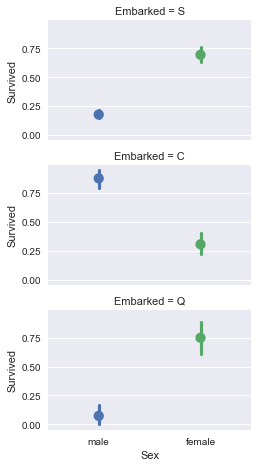

In [33]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Sex', 'Survived', palette='deep')
grid.add_legend()

**Decision.**
Combine Q with S as the distribution is more alike. 

### Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

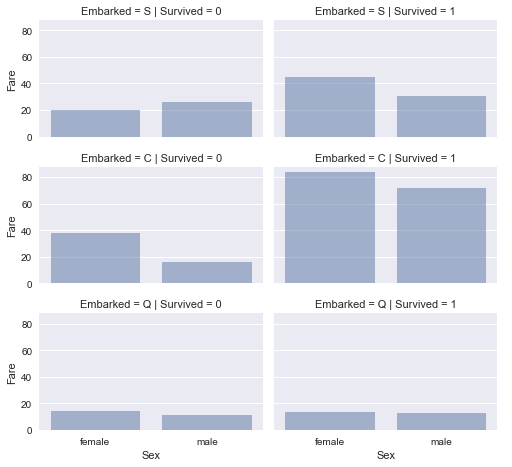

In [34]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

** Observations.**
<ul>
<li> Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.</li>
<li> Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).</li>
</ul>
**Decisions.**
<ul>
<li>Consider banding Fare feature.</li>
</ul>

### Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

In [35]:
# Cabin
type(train_df.loc[1, 'Cabin'])

train_df['Has_Cabin'] = train_df['Cabin'].apply(lambda x : 0 if pd.isnull(x) else 1)
train_df[['Has_Cabin', 'Survived']].groupby('Has_Cabin', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


** Decisions.**
<ul>
<li>Include Has_Cabin as a new feature</li>
</ul>

In [36]:
test_df['Has_Cabin'] = test_df['Cabin'].apply(lambda x : 0 if pd.isnull(x) else 1)

In [37]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 13), (418, 12), (891, 13), (418, 12))


('After', (891, 12), (418, 11), (891, 12), (418, 11))

In [38]:
#Ticket
type(train_df.loc[0, 'Ticket'])

def extract(ticket) :
    if ticket is None:
        return 0,0
    l = ticket.split(' ')
    has_slash = l[0].find('/')
    length = 0
    if (len(l) > 0) :
        try:
            length = len(l[1])
        except IndexError:
            length = 0
    return has_slash, length

extract('STON/O2. 3101282') 

(4, 7)

In [39]:
train_df['Has_slash'] = train_df['Ticket'].apply(lambda x : extract(x)[0])
train_df['Ticket_len'] = train_df['Ticket'].apply(lambda x : extract(x)[1])
train_df[['Has_slash', 'Survived']].groupby('Has_slash', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Has_slash,Survived
0,-1,0.399748
4,4,0.384615
2,2,0.370370
5,5,0.117647
1,1,0.111111
3,3,0.000000


In [40]:
train_df[['Ticket_len', 'Survived']].groupby('Ticket_len', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Ticket_len,Survived
5,5,0.508621
3,3,0.500000
2,2,0.416667
0,0,0.383459
6,6,0.250000
4,4,0.235294
7,7,0.187500
1,1,0.000000


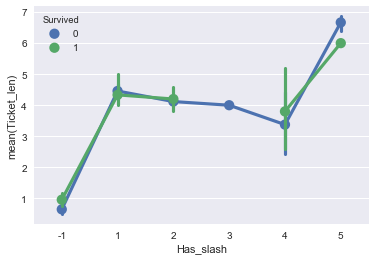

In [41]:
g = sns.pointplot(x="Has_slash", y="Ticket_len", hue = 'Survived', data=train_df)

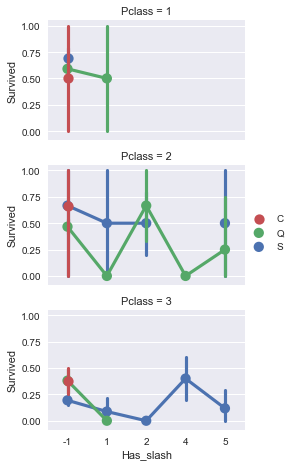

In [42]:
grid = sns.FacetGrid(train_df, row='Pclass', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Has_slash', 'Survived', 'Embarked', palette='deep')
grid.add_legend()

** Decisions.**
- Has_slash actually have something to do with Embarked and Pclass
- Include Has_slash and Ticket_len as features.

In [43]:
test_df['Has_slash'] = test_df['Ticket'].apply(lambda x : extract(x)[0])
test_df['Ticket_len'] = test_df['Ticket'].apply(lambda x : extract(x)[1])

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 14), (418, 13), (891, 14), (418, 13))


('After', (891, 13), (418, 12), (891, 13), (418, 12))

In [44]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [45]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [46]:
# Convert Titles by OneHotEncode

# We can convert the categorical titles to ordinal.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    
#train_df = pd.get_dummies(train_df, columns = ['Title'])
#test_df = pd.get_dummies(test_df, columns = ['Title'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,5,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,-1,5,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,4,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,-1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,-1,0,1


In [47]:
for data in combine:
    data['Name_len'] = data['Name'].apply(lambda x : len(re.split('[^a-zA-Z]', x)))

In [48]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 13), (418, 12))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.
Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [49]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len
0,0,3,0,22.0,1,0,7.2500,S,0,1,5,1,6
1,1,1,1,38.0,1,0,71.2833,C,1,-1,5,3,11
2,1,3,1,26.0,0,0,7.9250,S,0,4,7,2,5
3,1,1,1,35.0,1,0,53.1000,S,1,-1,0,3,11
4,0,3,0,35.0,0,0,8.0500,S,0,-1,0,1,6


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [50]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len
0,0,3,0,22.0,1,0,7.2500,0,0,1,5,1,6
1,1,1,1,38.0,1,0,71.2833,1,1,-1,5,3,11
2,1,3,1,26.0,0,0,7.9250,0,0,4,7,2,5
3,1,1,1,35.0,1,0,53.1000,0,1,-1,0,3,11
4,0,3,0,35.0,0,0,8.0500,0,0,-1,0,1,6


### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.
<ol>
<li> A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).</li>

<li> More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...</li>

<li> Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.</li>
</ol>
Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

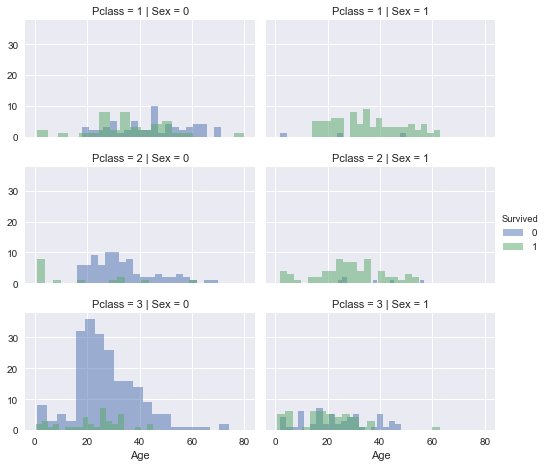

In [51]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', hue='Survived', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

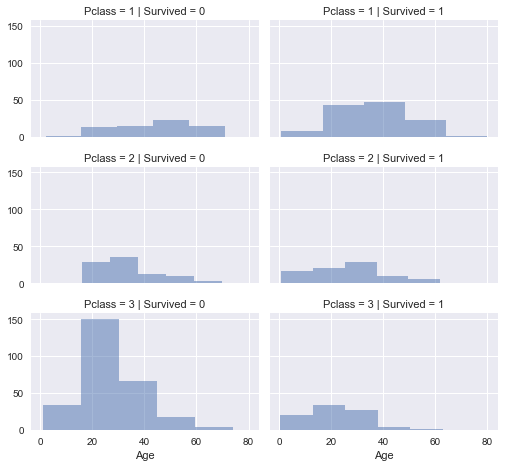

In [52]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Survived', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=5)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.
In [24]:


In [53]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [54]:
for dataset in combine :
    for i in range(0, 2) :
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = guess_df.median()
            
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex'] == i) & (dataset['Pclass'] == j + 1), 'Age'] \
            = guess_ages[i, j]
    dataset['Age'] = dataset['Age'].astype(int)

    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len
0,0,3,0,22,1,0,7.2500,0,0,1,5,1,6
1,1,1,1,38,1,0,71.2833,1,1,-1,5,3,11
2,1,3,1,26,0,0,7.9250,0,0,4,7,2,5
3,1,1,1,35,1,0,53.1000,0,1,-1,0,3,11
4,0,3,0,35,0,0,8.0500,0,0,-1,0,1,6


In [55]:
train_df.isnull().sum(axis=0)

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Has_Cabin     0
Has_slash     0
Ticket_len    0
Title         0
Name_len      0
dtype: int64

In [56]:
test_df.isnull().sum(axis=0)

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      0
Has_Cabin     0
Has_slash     0
Ticket_len    0
Title         0
Name_len      0
dtype: int64

In [57]:
train_df['Categorical_Age'] = 0
test_df['Categorical_Age'] = 0
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age
0,0,3,0,22,1,0,7.2500,0,0,1,5,1,6,0
1,1,1,1,38,1,0,71.2833,1,1,-1,5,3,11,0
2,1,3,1,26,0,0,7.9250,0,0,4,7,2,5,0
3,1,1,1,35,1,0,53.1000,0,1,-1,0,3,11,0
4,0,3,0,35,0,0,8.0500,0,0,-1,0,1,6,0


In [58]:
for i in range(2): 
    for j in range(3):
        train_df.loc[(train_df['Sex'] == i) &(train_df['Pclass'] == j + 1),'Categorical_Age'] = guess_ages[i, j]
        test_df.loc[(train_df['Sex'] == i) &(test_df['Pclass'] == j + 1),'Categorical_Age'] = guess_ages[i, j]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age
0,0,3,0,22,1,0,7.2500,0,0,1,5,1,6,24.0
1,1,1,1,38,1,0,71.2833,1,1,-1,5,3,11,41.0
2,1,3,1,26,0,0,7.9250,0,0,4,7,2,5,22.0
3,1,1,1,35,1,0,53.1000,0,1,-1,0,3,11,41.0
4,0,3,0,35,0,0,8.0500,0,0,-1,0,1,6,24.0


In [59]:
for dataset in combine:
    dataset['Categorical_Age'] = dataset['Categorical_Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age
0,0,3,0,22,1,0,7.2500,0,0,1,5,1,6,24
1,1,1,1,38,1,0,71.2833,1,1,-1,5,3,11,41
2,1,3,1,26,0,0,7.9250,0,0,4,7,2,5,22
3,1,1,1,35,1,0,53.1000,0,1,-1,0,3,11,41
4,0,3,0,35,0,0,8.0500,0,0,-1,0,1,6,24


Let us create Age bands and determine correlations with Survived.

In [60]:
for dataset in combine:
    dataset['Age2'] = 0
    dataset.loc[ dataset['Age'] <= 16, 'Age2'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age2'] = 2
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age2'] = 3
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age2'] = 4
    dataset.loc[ dataset['Age'] > 64, 'Age2'] = 5
    dataset['Age2'] = dataset['Age2'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,Age2
0,0,3,0,22,1,0,7.2500,0,0,1,5,1,6,24,2
1,1,1,1,38,1,0,71.2833,1,1,-1,5,3,11,41,3
2,1,3,1,26,0,0,7.9250,0,0,4,7,2,5,22,2
3,1,1,1,35,1,0,53.1000,0,1,-1,0,3,11,41,3
4,0,3,0,35,0,0,8.0500,0,0,-1,0,1,6,24,3


In [61]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 20)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'],\
                                          as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 4.0]",0.675000
1,"(4.0, 8.0]",0.642857
2,"(8.0, 12.0]",0.266667
3,"(12.0, 16.0]",0.483871
4,"(16.0, 20.0]",0.337500
5,"(20.0, 24.0]",0.435714
6,"(24.0, 28.0]",0.225275
7,"(28.0, 32.0]",0.408602
8,"(32.0, 36.0]",0.530864
9,"(36.0, 40.0]",0.328358


Let us replace Age with ordinals based on these bands.

In [62]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 4, 'Age'] = 1
    dataset.loc[(dataset['Age'] > 4) & (dataset['Age'] <= 8), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 12), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 16), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 20), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 24), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 28), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 36), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 40), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 48), 'Age'] = 11
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 56), 'Age'] = 12
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 64), 'Age'] = 13
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 14
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,Age2,AgeBand
0,0,3,0,6,1,0,7.2500,0,0,1,5,1,6,24,2,"(20.0, 24.0]"
1,1,1,1,10,1,0,71.2833,1,1,-1,5,3,11,41,3,"(36.0, 40.0]"
2,1,3,1,7,0,0,7.9250,0,0,4,7,2,5,22,2,"(24.0, 28.0]"
3,1,1,1,9,1,0,53.1000,0,1,-1,0,3,11,41,3,"(32.0, 36.0]"
4,0,3,0,9,0,0,8.0500,0,0,-1,0,1,6,24,3,"(32.0, 36.0]"


In [63]:
train_df['Categorical_Age'].unique()

array([24, 41, 22, 42, 28])

In [64]:
age_dict={24: 6, 41: 11, 22: 6, 42: 11, 28: 7}

In [65]:
for data in combine:
    data.Categorical_Age=data.Categorical_Age.map(age_dict)

In [66]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,Age2,AgeBand
0,0,3,0,6,1,0,7.2500,0,0,1,5,1,6,6,2,"(20.0, 24.0]"
1,1,1,1,10,1,0,71.2833,1,1,-1,5,3,11,11,3,"(36.0, 40.0]"
2,1,3,1,7,0,0,7.9250,0,0,4,7,2,5,6,2,"(24.0, 28.0]"
3,1,1,1,9,1,0,53.1000,0,1,-1,0,3,11,11,3,"(32.0, 36.0]"
4,0,3,0,9,0,0,8.0500,0,0,-1,0,1,6,6,3,"(32.0, 36.0]"


In [67]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,Age2
0,3,0,9,0,0,7.8292,2,0,-1,0,1,5,6,3
1,3,1,11,1,0,7.0000,0,0,-1,0,3,9,6,3
2,2,0,13,0,0,9.6875,2,0,-1,0,1,6,6,4
3,3,0,7,0,0,8.6625,0,0,-1,0,1,5,6,2
4,3,1,6,1,1,12.2875,0,0,-1,0,3,10,6,2


In [68]:
train_df = train_df.drop(['AgeBand'], axis = 1)

In [69]:
train_df.shape, test_df.shape

((891, 15), (418, 14))

In [70]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,Age2
0,0,3,0,6,1,0,7.2500,0,0,1,5,1,6,6,2
1,1,1,1,10,1,0,71.2833,1,1,-1,5,3,11,11,3
2,1,3,1,7,0,0,7.9250,0,0,4,7,2,5,6,2
3,1,1,1,9,1,0,53.1000,0,1,-1,0,3,11,11,3
4,0,3,0,9,0,0,8.0500,0,0,-1,0,1,6,6,3


In [71]:
combine = [train_df, test_df]

### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [72]:
for dataset in combine :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [73]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp.

In [74]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,Age2,FamilySize,IsAlone
0,0,3,0,6,7.2500,0,0,1,5,1,6,6,2,2,0
1,1,1,1,10,71.2833,1,1,-1,5,3,11,11,3,2,0
2,1,3,1,7,7.9250,0,0,4,7,2,5,6,2,1,1
3,1,1,1,9,53.1000,0,1,-1,0,3,11,11,3,2,0
4,0,3,0,9,8.0500,0,0,-1,0,1,6,6,3,1,1


We can also create an artificial feature combining Pclass and Age.

In [97]:
survived=train_df[['Age', 'Pclass', 'Survived']].groupby(['Age', 'Pclass'], as_index=False).mean()

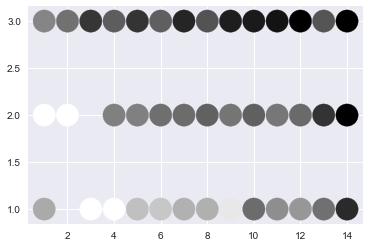

In [96]:
plt.scatter(x=survived['Age'], y=survived['Pclass'], c=survived['Survived'], s=500)

In [84]:
train_df[['Age', 'Pclass', 'Survived']].pivot_table(index='Pclass', columns='Age')

Survived                                                              \
Age           1         2         3         4         5         6         7    
Pclass                                                                         
1       0.666667       NaN  1.000000  1.000000  0.750000  0.777778  0.692308   
2       1.000000  1.000000       NaN  0.500000  0.500000  0.434783  0.423077   
3       0.520000  0.444444  0.214286  0.363636  0.203704  0.373737  0.146853   

                                                                              
Age           8         9         10        11        12        13        14  
Pclass                                                                        
1       0.687500  0.906250  0.425000  0.555556  0.592593  0.437500  0.166667  
2       0.382353  0.458333  0.375000  0.466667  0.416667  0.200000  0.000000  
3       0.325581  0.120000  0.105263  0.076923  0.000000  0.333333  0.000000

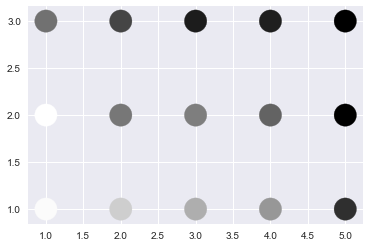

In [98]:
survived2=train_df[['Age2', 'Pclass', 'Survived']].groupby(['Age2', 'Pclass'], as_index=False).mean()
plt.scatter(x=survived2['Age2'], y=survived2['Pclass'], c=survived2['Survived'], s=500)
plt.gray()

In [99]:
train_df[['Age2', 'Pclass', 'Survived']].pivot_table(index='Pclass', columns='Age2')

Survived                                        
Age2           1         2         3         4         5
Pclass                                                  
1       0.888889  0.728814  0.616162  0.534884  0.166667
2       0.904762  0.422680  0.446809  0.352941  0.000000
3       0.400000  0.244838  0.100000  0.111111  0.000000

In [101]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age2 * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age2', 'Pclass']].head(10)

,Age*Class,Age2,Pclass
0,6,2,3
1,3,3,1
2,6,2,3
3,3,3,1
4,9,3,3
5,6,2,3
6,4,4,1
7,3,1,3
8,6,2,3
9,2,1,2


In [102]:
for dataset in combine:
    dataset['Age2+Class'] = dataset.Age2 + dataset.Pclass

train_df.loc[:, ['Age2+Class', 'Age2', 'Pclass']].head(10)

,Age2+Class,Age2,Pclass
0,5,2,3
1,4,3,1
2,5,2,3
3,4,3,1
4,6,3,3
5,5,2,3
6,5,4,1
7,4,1,3
8,5,2,3
9,3,1,2


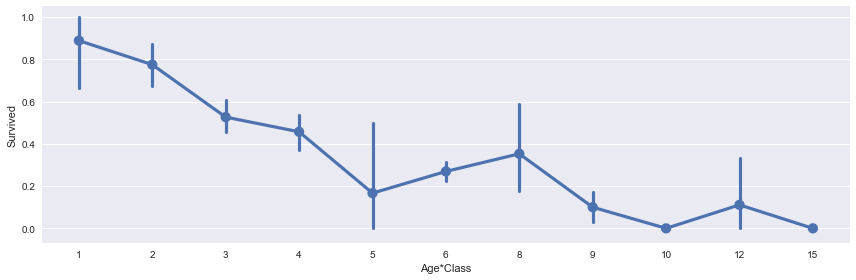

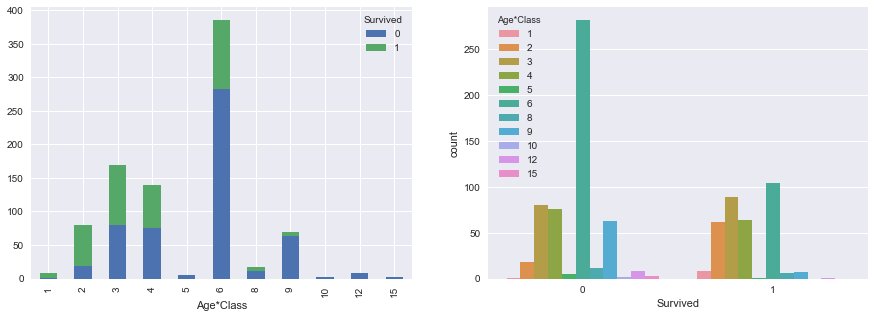

In [103]:
cate_plot(train_df, 'Age*Class', 'Survived', order=[0,1])

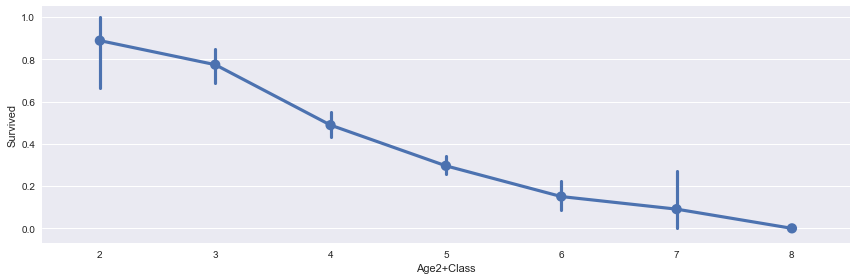

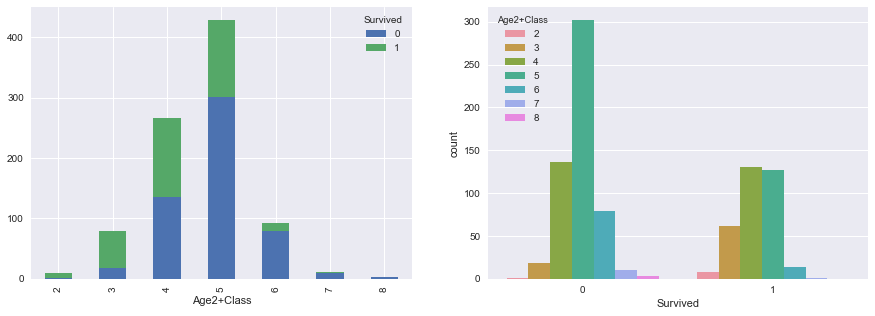

In [104]:
cate_plot(train_df, 'Age2+Class', 'Survived', order=[0,1])

### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [105]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,Age2,FamilySize,IsAlone,Age*Class,Age2+Class
0,3,0,9,7.8292,2,0,-1,0,1,5,6,3,1,1,9,6
1,3,1,11,7.0000,0,0,-1,0,3,9,6,3,2,0,9,6
2,2,0,13,9.6875,2,0,-1,0,1,6,6,4,1,1,8,6
3,3,0,7,8.6625,0,0,-1,0,1,5,6,2,1,1,6,5
4,3,1,6,12.2875,0,0,-1,0,3,10,6,2,3,0,6,5


train_df['LogFare']=train_df.Fare.apply(np.log)
test_df['LogFare']=test_df.Fare.apply(np.log)

train_df['LogFare'].apply(np.isinf).sum(), test_df['LogFare'].apply(np.isinf).sum()

ulimit=np.nanpercentile(train_df['LogFare'].values, 99)
llimit=np.nanpercentile(train_df['LogFare'].values, 1)
llimit, ulimit

llimit=train_df.loc[~train_df['LogFare'].apply(np.isinf), 'LogFare'].min()
llimit

train_df.replace({'LogFare':{np.inf: ulimit, -np.inf:llimit}}, inplace=True)
test_df.replace({'LogFare':{np.inf: ulimit, -np.inf:llimit}}, inplace=True)
train_df['LogFare'].apply(np.isinf).any()

sns.violinplot(x='Survived', y='LogFare', data=train_df)

We now create FareBand.

In [106]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'],\
                                           as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [107]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,Age2,FamilySize,IsAlone,Age*Class,Age2+Class
0,0,3,0,6,0,0,0,1,5,1,6,6,2,2,0,6,5
1,1,1,1,10,3,1,1,-1,5,3,11,11,3,2,0,3,4
2,1,3,1,7,1,0,0,4,7,2,5,6,2,1,1,6,5
3,1,1,1,9,3,0,1,-1,0,3,11,11,3,2,0,3,4
4,0,3,0,9,1,0,0,-1,0,1,6,6,3,1,1,9,6


### Correlation between pair of data

This is to see if we can engineer new features.

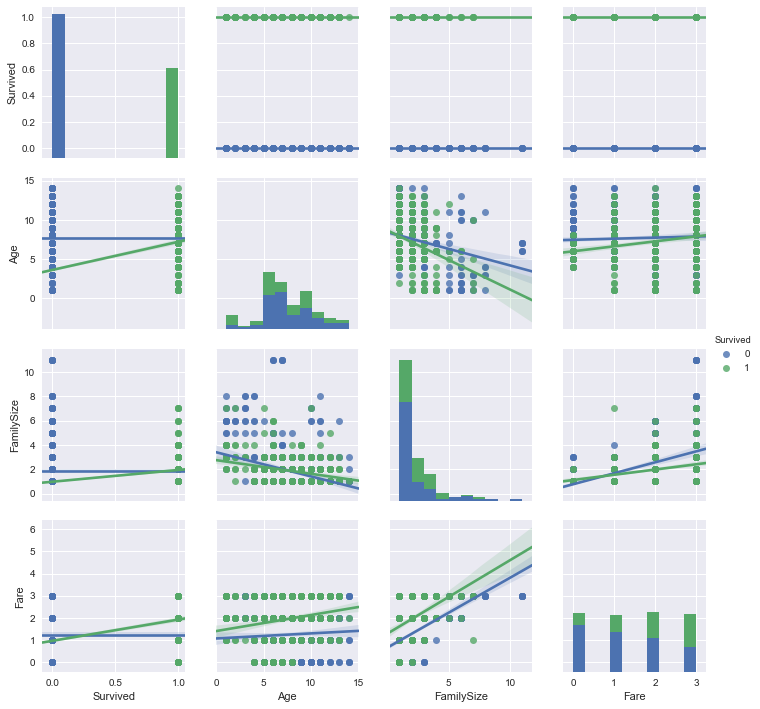

In [108]:
sns.pairplot(data = train_df[['Survived', 'Age', 'FamilySize', 'Fare']], kind = 'reg', hue = 'Survived')

### OneHotEncode

Since the features Pclass, Embarked and Title really are not ordinal, we need to use one hot encode to change them to categorical features. However, there is some problem with one hot encode (or get dummies), we can only do it in the end. Othewise it will cause some of the codes not executing. 

In [109]:
# preprocessing change categorical to onehotencode
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
columnsToEncode = ['Pclass', 'Embarked', 'Title']
enc.fit(train_df[columnsToEncode])

train_df = pd.concat([train_df.drop(columnsToEncode, axis = 1),
          pd.DataFrame(enc.transform(train_df[columnsToEncode]).toarray())], axis=1).reindex()
train_df.head()

,Survived,Sex,Age,Fare,Has_Cabin,Has_slash,Ticket_len,Name_len,Categorical_Age,Age2,...,1,2,3,4,5,6,7,8,9,10
0,0,0,6,0,0,1,5,6,6,2,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,10,3,1,-1,5,11,11,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,7,1,0,4,7,5,6,2,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,9,3,1,-1,0,11,11,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,9,1,0,-1,0,6,6,3,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The one single improvement is actually caused by this one hot encode. See below for comments. 

In [110]:
test_df = pd.concat([test_df.drop(columnsToEncode, axis = 1),
          pd.DataFrame(enc.transform(test_df[columnsToEncode]).toarray())], axis=1).reindex()
test_df.head()

,Sex,Age,Fare,Has_Cabin,Has_slash,Ticket_len,Name_len,Categorical_Age,Age2,FamilySize,...,1,2,3,4,5,6,7,8,9,10
0,0,9,0,0,-1,0,5,6,3,1,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,11,0,0,-1,0,9,6,3,2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,13,1,0,-1,0,6,6,4,1,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0,7,1,0,-1,0,5,6,2,1,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,6,1,0,-1,0,10,6,2,3,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Test Features

In [111]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']
SEED = 43 # for replication. 

In [112]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier as MLP
import xgboost as xgb

# score
from sklearn.metrics import accuracy_score

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [113]:
from __future__ import print_function
from __future__ import division

from sklearn.datasets import make_classification
from sklearn.cross_validation import cross_val_score

In [114]:
columns=X.columns.values.tolist()

In [116]:
columns1= columns[:]
columns1

['Sex',
 'Age',
 'Fare',
 'Has_Cabin',
 'Has_slash',
 'Ticket_len',
 'Name_len',
 'Categorical_Age',
 'Age2',
 'FamilySize',
 'IsAlone',
 'Age*Class',
 'Age2+Class',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10]

In [118]:
columns1.remove('Age*Class')
columns1.remove('Age2+Class')
columns1

['Sex',
 'Age',
 'Fare',
 'Has_Cabin',
 'Has_slash',
 'Ticket_len',
 'Name_len',
 'Categorical_Age',
 'Age2',
 'FamilySize',
 'IsAlone',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10]

In [119]:
columns1.remove('Age2')

In [120]:
columns2=columns[:]
columns2.remove('Age2')
columns2.remove('Age*Class')
columns2

['Sex',
 'Age',
 'Fare',
 'Has_Cabin',
 'Has_slash',
 'Ticket_len',
 'Name_len',
 'Categorical_Age',
 'FamilySize',
 'IsAlone',
 'Age2+Class',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10]

In [121]:
columns3=columns[:]
columns3.remove('Age2')
columns3.remove('Age2+Class')
columns3

['Sex',
 'Age',
 'Fare',
 'Has_Cabin',
 'Has_slash',
 'Ticket_len',
 'Name_len',
 'Categorical_Age',
 'FamilySize',
 'IsAlone',
 'Age*Class',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10]

In [122]:
model1= X[columns1]
model2= X[columns2]
model3= X[columns3]

In [127]:
# Gradient Boosting parameters
gb_params = {
    'n_estimators': 87,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'verbose': 0,
    'random_state' : SEED
}

# XGB
xgb_params = {
    'n_estimators': 100,
    'max_depth': 14,
    'min_child_weight': 1,
    'gamma': 0.88,                        
    'objective': 'binary:logistic',
    'nthread': -1,
    'scale_pos_weight':1
}

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
def cv_score(X, clf):
    val = cross_val_score(clf, X, y, cv=5, scoring = 'accuracy')
    return val.mean()

In [134]:
# Gradient Boosting parameters
X_train , X_test, y_train, y_test = train_test_split(model1, y, test_size = 0.2, random_state = 3823)
gb1 = GradientBoostingClassifier(**gb_params)
gb1.fit(X_train, y_train)
y_pred = gb1.predict(X_test)
acc_gb1 = accuracy_score(y_test, y_pred)
gb1 = GradientBoostingClassifier(**gb_params)
cv_gb1 = cv_score(model1, gb1)
acc_gb1, cv_gb1

(0.84357541899441346, 0.8316911525586862)

In [140]:
X_train , X_test, y_train, y_test = train_test_split(model2, y, test_size = 0.2, random_state = 3823)
gb2 = GradientBoostingClassifier(**gb_params)
gb2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=87,
              presort='auto', random_state=43, subsample=1.0, verbose=0,
              warm_start=False)

In [135]:
y_pred = gb2.predict(X_test)
acc_gb2 = accuracy_score(y_test, y_pred)
gb2 = GradientBoostingClassifier(**gb_params)
cv_gb2 = cv_score(model2, gb2)
acc_gb2, cv_gb2

(0.84916201117318435, 0.82945023861731393)

In [136]:
X_train , X_test, y_train, y_test = train_test_split(model3, y, test_size = 0.2, random_state = 3823)
gb3 = GradientBoostingClassifier(**gb_params)
gb3.fit(X_train, y_train)
y_pred = gb3.predict(X_test)
acc_gb3 = accuracy_score(y_test, y_pred)
gb3 = GradientBoostingClassifier(**gb_params)
cv_gb3 = cv_score(model3, gb3)
acc_gb3, cv_gb3

(0.83240223463687146, 0.82496213366470583)

Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [137]:
models = pd.DataFrame({
    'Model': ['model1', 'model2', 'model3'],
    'CV_Score': [cv_gb1, cv_gb2, cv_gb3],
    'ACC_Score': [acc_gb1, acc_gb2, acc_gb3]
})
models.sort_values(by='CV_Score', ascending=False)

,ACC_Score,CV_Score,Model
0,0.843575,0.831691,model1
1,0.849162,0.829450,model2
2,0.832402,0.824962,model3


### Conclusion

It is not worth adding Age*Class